In [5]:
import pandas as pd
data = pd.read_csv('githubuser.csv',delimiter=',')
data

,id,status,username,joining_time,stars,repo_number,followering_number,followers_number,language,repos_info,received_events,create_time,modify_time
0,1299,1,mitchellh,2008-02-28 07:27:54,"[{""repo_id"":""13802878"",""repo_name"":""bintray-do...",106,0,8087,"{""Ruby"":80336,""Smarty"":1873,""Shell"":151775,""Ma...","[{""size"":100,""repo_id"":""13802878"",""repo_name"":...","[{""date"":1607647480000,""repo"":""hashicorp/waypo...",2020-12-11 14:36:31,2020-12-11 14:36:31
1,6180,1,carllerche,2008-04-11 01:55:54,"[{""repo_id"":""1583268"",""repo_name"":"".emacs.d"",""...",83,0,1684,"{""Emacs Lisp"":1283186,""Clojure"":13280,""Rust"":1...","[{""size"":3999,""repo_id"":""1583268"",""repo_name"":...","[{""date"":1607654540000,""repo"":""tokio-rs/tokio""...",2020-12-11 14:38:41,2020-12-11 14:38:41
2,6508,1,vdemeester,2008-04-11 14:56:22,"[{""repo_id"":""29210185"",""repo_name"":""ansible-ss...",184,168,475,"{""Shell"":1108721,""Makefile"":73933,""Go"":1404769...","[{""size"":140,""repo_id"":""29210185"",""repo_name"":...","[{""date"":1607670074000,""repo"":""vdemeester/nixp...",2020-12-11 15:58:49,2020-12-11 15:58:49
3,6843,1,jinzhu,2008-04-12 09:27:32,"[{""repo_id"":""296228920"",""repo_name"":"".github"",...",91,9,2991,"{""Ruby"":719817,""JavaScript"":33913,""Go"":471180,...","[{""size"":0,""repo_id"":""296228920"",""repo_name"":""...","[{""date"":1607667385000,""repo"":""go-gorm/gorm"",""...",2020-12-11 15:24:29,2020-12-11 15:24:29
4,9758,1,weekface,2008-05-09 11:35:45,"[{""repo_id"":""47801051"",""repo_name"":""100-gdb-ti...",30,264,78,"{""Shell"":2018178,""Go"":55188228,""Makefile"":1534...","[{""size"":962,""repo_id"":""47801051"",""repo_name"":...",[],2020-12-11 16:19:39,2020-12-11 16:19:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,43253347,1,Fei-Guo,2018-09-14 05:08:44,"[{""repo_id"":""185470778"",""repo_name"":""community...",8,0,18,"{""Dockerfile"":7418,""Shell"":86204,""Makefile"":35...","[{""size"":37881,""repo_id"":""185470778"",""repo_nam...","[{""date"":1607628281000,""repo"":""alibaba/openyur...",2020-12-11 18:03:41,2020-12-11 18:03:41
134,43691843,1,zcuizhichen,2018-09-29 11:31:45,"[{""repo_id"":""157886962"",""repo_name"":""biao-clas...",11,13,8,"{""TypeScript"":46769,""Java"":76185,""CSS"":184642,...","[{""size"":104264,""repo_id"":""157886962"",""repo_na...","[{""date"":1603857445000,""repo"":""ruanyf/weekly"",...",2020-12-11 17:02:37,2020-12-11 17:02:37
135,45403751,1,NegroBolchevique,2018-11-28 03:34:34,"[{""repo_id"":""221881890"",""repo_name"":""github-sl...",5,201,9,"{""CSS"":102107,""Shell"":10420,""HTML"":119152,""Rub...","[{""size"":1677,""repo_id"":""221881890"",""repo_name...","[{""date"":1603965783000,""repo"":""harismuneer/Ult...",2020-12-11 15:35:34,2020-12-11 15:35:34
136,57081505,1,rambohe-ch,2019-10-28 10:54:01,"[{""repo_id"":""309552800"",""repo_name"":""apiserver...",3,1,3,"{""Dockerfile"":3542,""Makefile"":14421,""Go"":24192...","[{""size"":13759,""repo_id"":""309552800"",""repo_nam...","[{""date"":1607582014000,""repo"":""alibaba/openyur...",2020-12-11 18:12:46,2020-12-11 18:12:46


In [3]:
import pandas as pd
import pymysql

conn=pymysql.connect(host='cdb-er8xfzac.cd.tencentcdb.com',database='REVIEW',user='root',
password='review123456',port=10174,charset='utf8')
sql='select id,user_login,body,path,commit_id,in_reply_to_id,repo_full_name from reviewComment limit 100'
r=pd.read_sql(sql,conn)
#关闭数据库链接
conn.close()
print(r.head(5))

     id   user_login                                               body  \
0   121    agramfort                    spaces after commas thanks :)\n   
1   122    agramfort  are you sure about cfort? is does not appear e...   
2  1161       elupus  Any reason this check is removed? Should we no...   
3  1252  jmarshallnz  Yup - look up  for internal_version (this inli...   
4  1551    agramfort                                does or does not?\n   

                                                path  \
0     scikits/learn/svm/src/liblinear/_liblinear.pyx   
1  scikits/learn/svm/src/liblinear/liblinear_help...   
2                       xbmc/dbwrappers/Database.cpp   
3                       xbmc/dbwrappers/Database.cpp   
4                       doc/developers/neighbors.rst   

                                  commit_id in_reply_to_id repo_full_name  
0  e5291691809e5b4d35eb46af77680a85ebbe9976           None           None  
1  e5291691809e5b4d35eb46af77680a85ebbe9976           None  

(0.0, 15.0)

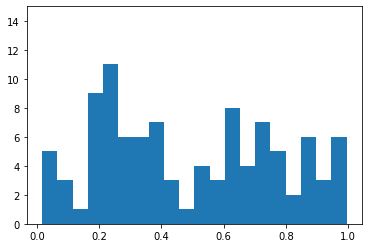

In [3]:
import matplotlib.pyplot as plt
import numpy as np
a = np.random.rand(100)
plt.hist(a,bins= 20) #100个值进行20等分
plt.ylim(0,15) #限制y轴高度：0→15